## Experiments for Trustworthy AI Project

Code is pretty rough.. 
If you don't want to run the experiment again, please just load `reclor_1000_response.json` file

#### 1. Installing Packages and Dependencies 

In [1]:
# make sure that you installed those dependencies; ChatGPT won't work without the latest version of openai
%pip install openai
%pip install python-dotenv
%pip install requests
%pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.0 MB/s eta 0:00:001.1 MB/s eta 0:00:01
  Attempting uninstall: openai
    Found existing installation: openai 0.27.1
    Uninstalling openai-0.27.1:
      Successfully uninstalled openai-0.27.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install python-decouple

In [2]:
# import the necessary libraries
import os
import json
from decouple import config
import matplotlib.pyplot as plt
import pandas as pd
import openai
import random

In [3]:
from decouple import config

OPENAI_API_KEY = config('API_KEY')
openai.api_key = OPENAI_API_KEY


#### 2. Loading the Data 

In [7]:
# Load the JSON file from the reclor folder 
with open('./reclor_data/train.json') as f:
    data = json.load(f)

# Check the length of the data
print(len(data))

4638


In [8]:
# Load the JSON file
with open('./reclor_data/train.json') as f:
    reclor_train_data = json.load(f)

# Cut the data to 10, 50, 100, 1000 samples
reclor_train_data_10 = random.sample(reclor_train_data, 10)
reclor_train_data_50 = random.sample(reclor_train_data, 50)
reclor_train_data_100 = random.sample(reclor_train_data, 100)
reclor_train_data_1000 = random.sample(reclor_train_data, 1000)

#### 3.1 Experiment on ChatGPT

In [147]:
# begin the chatgpt experiment by prompting the model with a question in the sampled data

answer_list = []

for reclor_quesiton in reclor_train_data_10:
    single_answer = {}
    context = reclor_quesiton['context']
    question = reclor_quesiton['question']
    answers = reclor_quesiton['answers']
    id_string = reclor_quesiton['id_string']
    label = reclor_quesiton['label']
    
    answer_obj = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a logician and an LSAT taker."},
            {"role": "user", "content": f'Given the context: {context} and question {question}. Please choose the correct answer among a list of answers given: {answers}. Give your the answer as a number, where 0 refers to the first answer in the answer list, 1 is the second answer in the answer list, 2 is the third answer in the answer list, and 3 is the fourth answer in the answer list. State this number first, then state your confidence in that answer, finally give an explanation of the general logical reasoning you used to find the answer. Sample Response "The answer is 0. I am 33 percent confident that my answer is right. This is in accordance with the following facts...."'},
        ]
    )
    
    chatgpt_answer = answer_obj["choices"][0]["message"]["content"]
    
    single_answer['id'] = id_string
    single_answer['correct_answer'] = label
    single_answer['chat_gptanswer'] = chatgpt_answer
    
    answer_list.append(single_answer)
    
answer_list


[{'id': 'train_1993',
  'correct_answer': 0,
  'chat_gptanswer': "The answer is 1. I am 100 percent confident that my answer is right. The argument assumes that Sanderson had something to gain by his cousin's continuing to believe that the factory would remain open. The argument asserts that Sanderson intentionally withheld information about the factory closing so that his cousin would assume it would remain open. The only logical reason for Sanderson to do this would be if he had something to gain by his cousin's continued belief in the factory's remaining open. Therefore, the assumption required by the argument is that Sanderson had something to gain by his cousin's continuing to believe that the factory would remain open. None of the other answer choices are necessary for the argument to hold."},
 {'id': 'train_3059',
  'correct_answer': 1,
  'chat_gptanswer': 'The answer is 1. I am 80 percent confident that my answer is right. The passage indicates that poor writers use elaborate s

In [47]:
# Writ the answer in a JSON format, very important if you don't want to waste money. If you don't do this, I will be charged for every single request you make to the API
with open('reclor_1000_response.json', 'w') as file:
    json.dump(answer_list, file)


In [ ]:
import json
# if you want to load the JSON file, you can do it like this

with open('reclor_1000_response.json', 'r') as f:
    # Load the contents of the file into a list
    answer_list = json.load(f)

# Print the list
print(answer_list)


In [7]:
answer_list[0]

{'id': 'train_3350',
 'correct_answer': 2,
 'chat_gptanswer': "\n\nThe answer is 2. I am 90% confident with my answer. The principle suggests that the Thimble Corporation has an obligation to rectify any unfair result of the situation they have created. Therefore, if there's a possibility that some customers did not apply for the rebate due to the incorrect expiration date, the Thimble Corporation should identify them and offer them the rebate to rectify the unfair result of their mistake."}

In [139]:
import re
import copy

# deep copy the list
answer_list_copy = copy.deepcopy(answer_list)

new_list1 = []
# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in answer_list_copy:
    # Use regular expressions to extract the answer label 
    response = {}
    
    answer_match = re.search(r'(\b[0-9]\b)', item['chat_gptanswer'])
    percentage_matches = re.findall(
        r'\b[1-9]\d{1,2}\b', item['chat_gptanswer'])

    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    if answer_match:
        # Update the dictionary value with the extracted number
        response['chat_gptanswer'] = int(answer_match.group(1))
        response['explanation'] = [".".join(item['chat_gptanswer'].split('.')[2:])]
    else:
        # If the regular expression doesn't match, set the value to None
        print(f'warning + {response["id"]}')
        continue  
    if percentage_matches: 
        response['confidence'] = int(percentage_matches[0])
    else: 
        print(f'warning + {response["id"]}')
        continue
    new_list1.append(response)
# Print the updated list of dictionaries
# print(new_list1)


warning + train_4569
warning + train_4134
warning + train_1654
warning + train_3263


In [141]:
# new_list1

In [142]:
import pandas as pd

df_chatgpt = pd.DataFrame(new_list1)
df_chatgpt.head()


,id,correct_answer,chat_gptanswer,explanation,confidence
0,train_3350,2,2,[ The principle suggests that the Thimble Corp...,90
1,train_2036,0,0,[ The argument in the answer 0 shares the same...,90
2,train_3344,3,2,[],90
3,train_4476,0,1,[],80
4,train_4317,1,1,[ The information supports the conclusion that...,100


In [143]:
df_chatgpt['chat_gpt_correct'] = df_chatgpt.apply(
    lambda row: 1 if row['correct_answer'] == row['chat_gptanswer'] else 0, axis=1)

percent_correct = df_chatgpt['chat_gpt_correct'].sum() / df_chatgpt.shape[0] * 100.0


In [144]:
df_chatgpt

,id,correct_answer,chat_gptanswer,explanation,confidence,chat_gpt_correct
0,train_3350,2,2,[ The principle suggests that the Thimble Corp...,90,1
1,train_2036,0,0,[ The argument in the answer 0 shares the same...,90,1
2,train_3344,3,2,[],90,0
3,train_4476,0,1,[],80,0
4,train_4317,1,1,[ The information supports the conclusion that...,100,1
...,...,...,...,...,...,...
991,train_4606,1,1,[ The conclusion drawn by the sociologist is t...,95,1
992,train_549,3,0,[ The fact that production work on Thieves beg...,90,0
993,train_2458,1,1,[ I am very confident (around 90%) that this i...,90,1
994,train_4214,1,1,[],95,1


In [13]:
# calculate how many questions model got correct
percent_correct

58.23293172690763

In [14]:
df_chatgpt['confidence'].mean()


89.68975903614458

In [15]:
filtered_df = df_chatgpt[df_chatgpt['correct'] != 1]


In [16]:
filtered_df['confidence'].mean()

89.14663461538461

In [18]:
filtered_df = df_chatgpt[df_chatgpt['correct'] != 0]

In [19]:
filtered_df['confidence'].mean()

90.07931034482759

In [20]:
correct_df = df_chatgpt[df_chatgpt['correct_answer'] == df_chatgpt['chat_gptanswer']]

In [21]:
correct_df

,id,correct_answer,chat_gptanswer,confidence,correct
0,train_3350,2,2,90,1
1,train_2036,0,0,90,1
4,train_4317,1,1,100,1
7,train_2884,0,0,90,1
8,train_1896,2,2,90,1
...,...,...,...,...,...
988,train_4252,3,3,80,1
989,train_1388,3,3,90,1
991,train_4606,1,1,95,1
993,train_2458,1,1,90,1


In [22]:
# change the below to a list 
correct_df['id']

correct_lst = correct_df['id'].tolist()

# print(correct_lst)

In [23]:
list_of_correct_gpt3=_answers = []

for item in reclor_train_data_1000:
    if item['id_string'] in correct_lst:
        list_of_correct_gpt3.append(item)


In [24]:
len(list_of_correct_gpt3)


114

#### 3.2 Experiment on GPT3

In [ ]:
gpt_answer_list = []

for reclor_quesiton in reclor_train_data_1000:
    single_answer = {}
    context = reclor_quesiton['context']
    quesiton = reclor_quesiton['question']
    answers = reclor_quesiton['answers']
    id_string = reclor_quesiton['id_string']
    label = reclor_quesiton['label']

    answer_obj = openai.Completion.create(
        model="text-davinci-003",
        max_tokens=300,
        prompt=f'Context: {context} and question {quesiton} choosing the correct answer among a list of answers in {answers}. State the answer you have chosen, then state its position in the list of answers. For example, 0 if it is the first answer; 1 if it is the second one; 2 if it is the third one, 3 if it is the fourth one. Give me the response in this format: "The answer label is 1. Not all people are bad at math." Answer: ?',
    )

    gpt3_answer = answer_obj["choices"][0]["text"]

    single_answer['id'] = id_string
    single_answer['correct_answer'] = label
    single_answer['gpt3_answer'] = gpt3_answer

    gpt_answer_list.append(single_answer)

print(gpt_answer_list)


In [ ]:
gpt_answer_list


In [25]:
with open('reclor_1000_gpt3_response.json', 'w') as file:
    json.dump(gpt_answer_list, file)


NameError: name 'gpt_answer_list' is not defined

In [97]:
# if you just want to load the file and not run the code above

import json

# Open the JSON file
with open('reclor_1000_gpt3_response.json', 'r') as f:
    # Load the contents of the file into a list
    gpt_answer_list = json.load(f)

# Print the list
# print(gpt_answer_list)


In [98]:
import re
import copy

# Your original list of dictionaries
# deep copy the list
copy_gpt_list = copy.deepcopy(gpt_answer_list)
final_gpt_list = []

# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in gpt_answer_list:
    # Use regular expressions to extract the answer label
    response = {}
    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    
    # Create a regular expression pattern to match the answer label
    regex_pattern = re.compile(r'\b(first|second|third|fourth)\b')
    item['gpt3_answer'] = regex_pattern.sub(lambda m: {
                                            'first': '0', 'second': '1', 'third': '2', 'fourth': '3'}[m.group(1)], item['gpt3_answer'])

    answer_match = re.search(r'(\b[0-9]\b)', item['gpt3_answer'])

    if answer_match:
        # Update the dictionary value with the extracted number
        response['gpt3_answer'] = int(answer_match.group(1))
    else:
        # If the regular expression doesn't match, set the value to None
        print(item['id'])
        continue
    
    final_gpt_list.append(response)
    


train_4208
train_2149
train_4176
train_3628
train_1795
train_325


In [99]:
import pandas as pd

df_gpt = pd.DataFrame(final_gpt_list)
df_gpt.head()

df_gpt['percent_correct'] = df_gpt.apply(
    lambda row: 1.0 if row['correct_answer'] == row['gpt3_answer'] else 0.0, axis=1)

percent_correct = df_gpt['percent_correct'].sum() / len(df_gpt) * 100.0

print(percent_correct)

47.68611670020121


In [100]:
df_gpt = df_gpt.rename(columns={'percent_correct': 'gpt_correct'})

df_gpt

,id,correct_answer,gpt3_answer,gpt_correct
0,train_3350,2,3,0.0
1,train_2036,0,3,0.0
2,train_3344,3,0,0.0
3,train_4476,0,1,0.0
4,train_4317,1,2,0.0
...,...,...,...,...
989,train_4606,1,1,1.0
990,train_549,3,2,0.0
991,train_2458,1,0,0.0
992,train_4214,1,2,0.0


In [101]:
# df_chatgpt = df_chatgpt.rename(columns={'correct': 'chatgpt_correct'})
# df_chatgpt = df_chatgpt.drop('confidence', axis=1)

df_chatgpt_drop_correct = df_chatgpt.drop('correct_answer', axis=1)
df_chatgpt_drop_correct


,id,chat_gptanswer,confidence,chat_gpt_correct
0,train_3350,2,90,1
1,train_2036,0,90,1
2,train_3344,2,90,0
3,train_4476,1,80,0
4,train_4317,1,100,1
...,...,...,...,...
991,train_4606,1,95,1
992,train_549,0,90,0
993,train_2458,1,90,1
994,train_4214,1,95,1


In [111]:
# df_chatgpt = df_chatgpt.rename(columns={'correct': 'chatgpt_correct'})
merged_df = pd.merge(df_chatgpt_drop_correct, df_gpt, on='id')
merged_df


,id,chat_gptanswer,confidence,chat_gpt_correct,correct_answer,gpt3_answer,gpt_correct
0,train_3350,2,90,1,2,3,0.0
1,train_2036,0,90,1,0,3,0.0
2,train_3344,2,90,0,3,0,0.0
3,train_4476,1,80,0,0,1,0.0
4,train_4317,1,100,1,1,2,0.0
...,...,...,...,...,...,...,...
985,train_4606,1,95,1,1,1,1.0
986,train_549,0,90,0,3,2,0.0
987,train_2458,1,90,1,1,0,0.0
988,train_4214,1,95,1,1,2,0.0


In [35]:
!pip install matplotlib_venn


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=080b1327299979fbe167bc82e884937fd147ecdbdce509736bc72ced0c510ad2
  Stored in directory: /Users/staceyn/Library/Caches/pip/wheels/ab/a1/93/9cbd4e11e6964009387cd595450dfcbb6998e15dfbaa5805dd
Successfully built matplotlib_venn


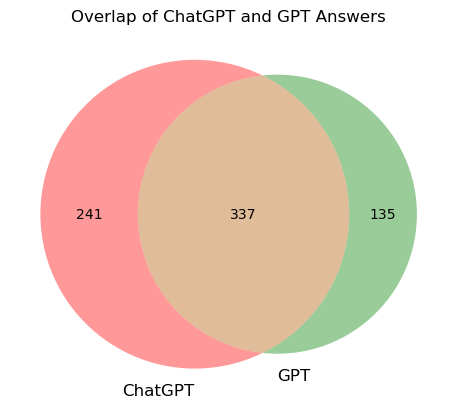

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

both_correct = merged_df[(merged_df['chatgpt_correct'] == True) &
                         (merged_df['gpt_correct'] == True)].shape[0]
only_chatgpt_correct = merged_df[(merged_df['chatgpt_correct'] == True) & (
    merged_df['gpt_correct'] == False)].shape[0]
only_gpt_correct = merged_df[(merged_df['chatgpt_correct'] == False) &
                             (merged_df['gpt_correct'] == True)].shape[0]
neither_correct = merged_df[(merged_df['chatgpt_correct'] == False) &
                            (merged_df['gpt_correct'] == False)].shape[0]

# Create the Venn diagram
venn2(subsets=(only_chatgpt_correct, only_gpt_correct, both_correct),
      set_labels=('ChatGPT', 'GPT'))

# Set the background color to white
plt.gca().set_facecolor('w')

# Add a title to the diagram
plt.title('Overlap of ChatGPT and GPT Answers')

# Show the diagram
plt.show()


In [152]:
both_incorr = merged_df[(merged_df['chat_gpt_correct'] == 0) & (merged_df['gpt_correct'] == 0)]
incorr_both_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in both_incorr['id'].to_list():
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        incorr_both_qs = pd.concat([incorr_both_qs,df1])
incorr_both_qs
complete_incorr_both_qs = pd.merge(incorr_both_qs, merged_df, left_on='id_string', right_on='id')
complete_incorr_both_qs = complete_incorr_both_qs.drop(['id', 'correct_answer', 'gpt_correct', 'chat_gpt_correct'], axis=1)
complete_incorr_both_qs

,id_string,question,answers,label,context,chat_gptanswer,confidence,gpt3_answer
0,train_5,"If, on the basis of the evidence above, it is ...",[Many firms in the metalworking industry have ...,0,"Firms adopting ""profit-related-pay"" (PRP) cont...",1,90,1
1,train_44,Which one of the following conclusions can be ...,[Patrick is not certain of being able to devis...,2,Only an expert in some branch of psychology co...,0,90,1
2,train_58,The reasoning in the argument is most vulnerab...,[fails to address the possibility that an appr...,0,When politicians describe their opponents' pos...,1,80,3
3,train_104,Judith's response shows that she interprets Ha...,[world travel is only possible via routes serv...,2,Harry: Airlines have made it possible for anyo...,1,90,1
4,train_136,Which one of the following can be properly inf...,"[If the city does not burn trash, it will not ...",2,"It is wrong to waste our natural resources, an...",3,100,3
...,...,...,...,...,...,...,...,...
272,train_4571,"Which one of the following, if true, most weak...","[In many surveys, people say that they would p...",1,Many economists claim that financial rewards p...,0,80,0
273,train_4574,"Which one of the following, if true, most weak...",[Excessive blinking has been shown to be a mos...,0,Psychologists have found that candidates for t...,1,90,3
274,train_4581,"Of the following, which one most closely confo...",[Astronomers often draw inferences about the e...,0,Some people mistakenly believe that since we d...,1,80,2
275,train_4600,Which one of the following best illustrates th...,[Whoever wants to advance a political agenda o...,3,Environmentalists who seek stricter government...,1,90,2


In [153]:
complete_incorr_both_qs.to_csv('data/complete_incorr_both_models_qs.csv', index=False)

In [112]:
gpt_corrs = merged_df[(merged_df['chat_gpt_correct'] == 0) & (merged_df['gpt_correct'] == 1)]
gpt_corrs

,id,chat_gptanswer,confidence,chat_gpt_correct,correct_answer,gpt3_answer,gpt_correct
13,train_3708,1,95,0,0,0,1.0
18,train_1874,0,90,0,1,1,1.0
22,train_1431,1,95,0,3,3,1.0
35,train_4435,3,90,0,0,0,1.0
44,train_4235,0,80,0,2,2,1.0
...,...,...,...,...,...,...,...
911,train_366,1,80,0,3,3,1.0
927,train_3769,1,80,0,2,2,1.0
931,train_2273,0,90,0,2,2,1.0
934,train_3358,2,95,0,3,3,1.0


In [48]:
reclor_train_data_1000[0]['i']

{'context': 'Throughout the Popoya Islands community pressure is exerted on people who win the national lottery to share their good fortune with their neighbors. When people living in rural areas win the lottery they invariably throw elaborate neighborhood feasts, often wiping out all of their lottery winnings. However, in the cities, lottery winners frequently use their winnings for their own personal investment rather than sharing their good fortune with their neighbors.',
 'question': 'Which one of the following, if true, contributes most to an explanation of the difference between the behavior of lottery winners in rural areas and those in cities?',
 'answers': ['Lottery winners in rural areas are notified of winning by public posting of lists of winners, but notification in the city is by private mail.',
  'Families in rural areas in the Popoyas many contain twelve or fourteen people, but city families average six or seven.',
  'Popoyan city dwellers tend to buy several lottery ti

In [128]:
corr_gpt_ans_ids = gpt_corrs['id'].to_list()
corr_gpt_ans = gpt_corrs['correct_answer'].to_list()
corr_gpt_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_gpt_ans_ids:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_gpt_ans_qs = pd.concat([corr_gpt_ans_qs,df1])
        # index += 1

In [108]:
corr_gpt_ans_qs

,id_string,question,answers,label,context
0,train_8,"Each of the following, if true, could explain ...",[The discharged water was warmer than the norm...,1,Shortly after the power plant opened and began...
0,train_16,Which one of the following would be most usefu...,[Were dogs who were accustomed to receiving re...,2,"In a study, pairs of trained dogs were placed ..."
0,train_103,The advertisement is misleading if which one o...,[Few people depend exclusively on apricots and...,3,Our tomato soup provides good nutrition: for i...
0,train_142,Which one of the following is an assumption re...,[If the Japanese drive on the left side of the...,0,Columnist: Over the last 20 years the demand i...
0,train_296,"Which one of the following statements, if true...",[If high concentrations of many different poll...,3,A positive correlation has been found between ...
...,...,...,...,...,...
0,train_4463,Which one of the following is most appropriate...,"[By that line of reasoning, we could conclude ...",3,Every brick house on River Street has a front ...
0,train_4483,The argument above can be attacked on the grou...,[It assumes that a general pattern is likely t...,0,The average size of marine life that washes up...
0,train_4504,"Which one of the following, if true, most dire...","[Often the purchaser of a product, such as a l...",0,Using fossil energy more efficiently is in the...
0,train_4613,"Which one of the following, if true, most stre...",[Most banks have similar charges for most serv...,1,Banking analyst: Banks often offer various ser...


In [127]:
both_corrs = merged_df[(merged_df['chat_gpt_correct'] == 1) & (merged_df['gpt_correct'] == 1)].copy()

corr_both_ans = both_corrs['id'].to_list()
corr_both_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_both_ans:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_both_ans_qs = pd.concat([corr_both_ans_qs,df1])
corr_both_ans_qs

,id_string,question,answers,label,context
0,train_1,The patient's argument proceeds by,[attempting to discredit a position by questio...,0,Patient: Pharmacists maintain that doctors sho...
0,train_11,The reasoning in the biologist's argument is m...,[focuses its attention on the study's author r...,0,Biologist: A careful study of the behavior of ...
0,train_18,Which one of the following is an assumption on...,[Government safety regulations are developed i...,3,Environmentalist: An increased number of oil s...
0,train_26,"In evaluating the argument, it would be most i...",[Whether the herb can thrive in soil that does...,3,A certain cultivated herb is one of a group of...
0,train_30,The reasoning in the argument is flawed becaus...,[fails to show that the mythical creature ment...,0,The simultaneous and apparently independent de...
...,...,...,...,...,...
0,train_4550,"Which of the following, if true, best supports...",[The growth of Smalltown's population has prim...,1,President of the Smalltown Chamber of Commerce...
0,train_4560,"Which of the following would, if true, most st...","[During the fifteenth century in Europe, mapma...",0,Historian: Fifteenth-century advances in mapma...
0,train_4594,Which one of the following principles underlie...,[If one breed of dog is more closely related t...,0,Biologist: Researchers believe that dogs are t...
0,train_4606,Which one of the following most accurately exp...,[Voters think of themselves as members of a co...,1,Sociologist: Some economists hold that unregul...


In [126]:
only_chatgpt_corrs = merged_df[(merged_df['chat_gpt_correct'] == 1) & (merged_df['gpt_correct'] == 0)].copy()

corr_chatgpt_ans = only_chatgpt_corrs['id'].to_list()
corr_chatgpt_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_chatgpt_ans:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_chatgpt_ans_qs = pd.concat([corr_chatgpt_ans_qs,df1])
corr_chatgpt_ans_qs

,id_string,question,answers,label,context
0,train_12,The reasoning above most closely conforms to w...,[People tend to ignore possible objectionable ...,0,The use of space-based satellites to study env...
0,train_48,The argument assumes which one of the following?,"[For hypochondriacs wearing tinted glasses, th...",2,Doctors in Britain have long suspected that pa...
0,train_93,"Which one of the following, if true, would pro...",[Government subsidies to urban manufacturers c...,2,"In some countries, national planners have atte..."
0,train_166,Which one of the following arguments exhibits ...,[Lopez will run in tomorrow's marathon. Lopez ...,0,Journalist: The trade union members at AutoFab...
0,train_172,In the ecologist's argument the two portions i...,[The first is a position that the ecologist re...,1,Ecologist: The Scottish Highlands were once th...
...,...,...,...,...,...
0,train_4585,The argument challenges a claim that two pairs...,"[""good"" does not apply to any of the same thin...",1,Some thinkers hold that whatever brings pleasu...
0,train_4610,Which one of the following generalizations doe...,[Peopie's evaluations of a situation sometimes...,0,When a chain of service stations began applyin...
0,train_4611,"Which one of the following statements, if true...",[The Internet and television advertisements ar...,3,An advertising firm creates campaigns for both...
0,train_4612,The reasoning in the researcher's argument is ...,[draws a general conclusion based on too small...,1,Researcher: All defects in short-term memory a...


In [129]:
corr_chatgpt_ans_qs['context_w_length'] = corr_chatgpt_ans_qs['context'].apply(lambda x: len(x.split()))
corr_chatgpt_ans_qs['question_w_length'] = corr_chatgpt_ans_qs['question'].apply(lambda x: len(x.split()))
corr_chatgpt_ans_qs['correct_answer'] = corr_chatgpt_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_chatgpt_ans_qs['corr_answer_w_length'] = corr_chatgpt_ans_qs['correct_answer'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['context_w_length'] = corr_gpt_ans_qs['context'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['question_w_length'] = corr_gpt_ans_qs['question'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['correct_answer'] = corr_gpt_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_gpt_ans_qs['corr_answer_w_length'] = corr_gpt_ans_qs['correct_answer'].apply(lambda x: len(x.split()))
corr_both_ans_qs['context_w_length'] = corr_both_ans_qs['context'].apply(lambda x: len(x.split()))
corr_both_ans_qs['question_w_length'] = corr_both_ans_qs['question'].apply(lambda x: len(x.split()))
corr_both_ans_qs['correct_answer'] = corr_both_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_both_ans_qs['corr_answer_w_length'] = corr_both_ans_qs['correct_answer'].apply(lambda x: len(x.split()))

In [130]:
corr_chatgpt_ans_qs

,id_string,question,answers,label,context,context_w_length,question_w_length,correct_answer,corr_answer_w_length
0,train_12,The reasoning above most closely conforms to w...,[People tend to ignore possible objectionable ...,0,The use of space-based satellites to study env...,72,13,People tend to ignore possible objectionable c...,13
0,train_48,The argument assumes which one of the following?,"[For hypochondriacs wearing tinted glasses, th...",2,Doctors in Britain have long suspected that pa...,88,8,The tinting does not dim light to the eye enou...,16
0,train_93,"Which one of the following, if true, would pro...",[Government subsidies to urban manufacturers c...,2,"In some countries, national planners have atte...",62,16,A scarcity of agricultural products is a centr...,15
0,train_166,Which one of the following arguments exhibits ...,[Lopez will run in tomorrow's marathon. Lopez ...,0,Journalist: The trade union members at AutoFab...,53,20,Lopez will run in tomorrow's marathon. Lopez w...,47
0,train_172,In the ecologist's argument the two portions i...,[The first is a position that the ecologist re...,1,Ecologist: The Scottish Highlands were once th...,132,15,"The first is evidence that, in light of the ev...",25
...,...,...,...,...,...,...,...,...,...
0,train_4585,The argument challenges a claim that two pairs...,"[""good"" does not apply to any of the same thin...",1,Some thinkers hold that whatever brings pleasu...,60,15,"""good"" and ""evil"" do not bear the same relatio...",20
0,train_4610,Which one of the following generalizations doe...,[Peopie's evaluations of a situation sometimes...,0,When a chain of service stations began applyin...,66,14,Peopie's evaluations of a situation sometimes ...,20
0,train_4611,"Which one of the following statements, if true...",[The Internet and television advertisements ar...,3,An advertising firm creates campaigns for both...,44,13,Internet advertisements allow the firm to more...,10
0,train_4612,The reasoning in the researcher's argument is ...,[draws a general conclusion based on too small...,1,Researcher: All defects in short-term memory a...,68,17,"presumes, without giving justification, that a...",13


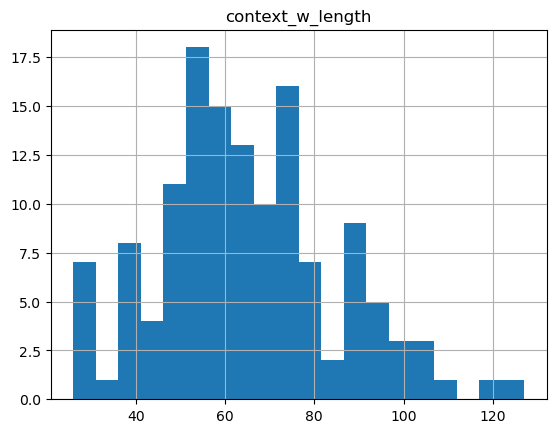

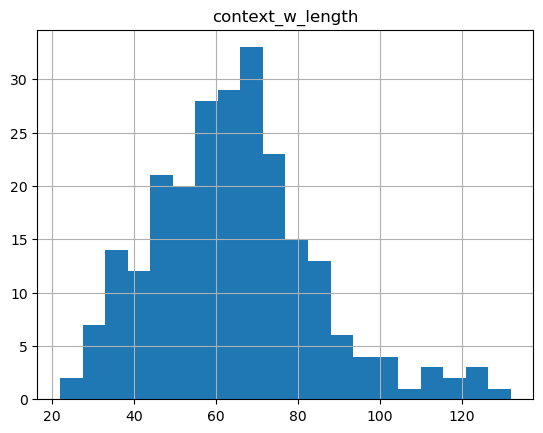

In [80]:
hist = corr_gpt_ans_qs.hist(column='context_w_length', bins=20)
hist = corr_chatgpt_ans_qs.hist(column='context_w_length', bins=20)

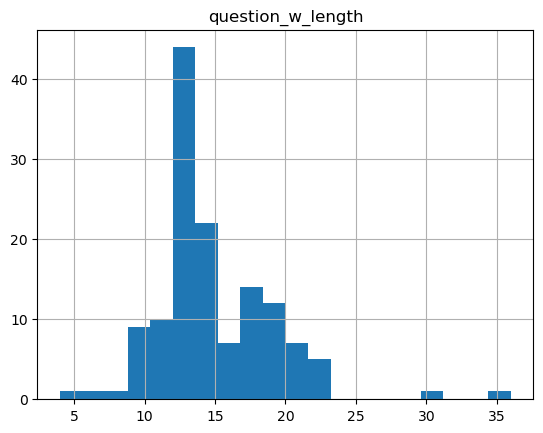

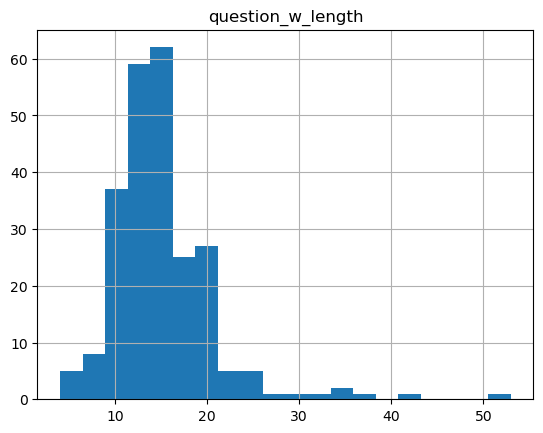

In [81]:
hist = corr_gpt_ans_qs.hist(column='question_w_length', bins=20)
hist = corr_chatgpt_ans_qs.hist(column='question_w_length', bins=20)

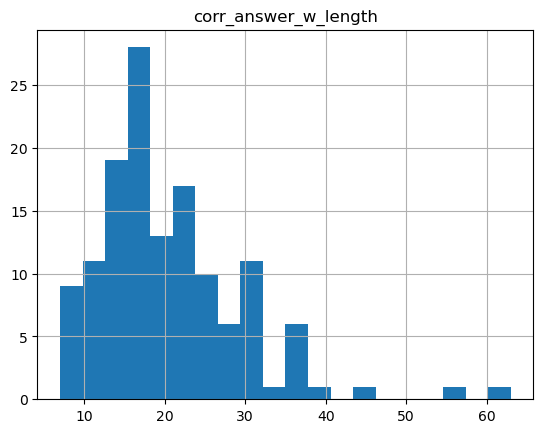

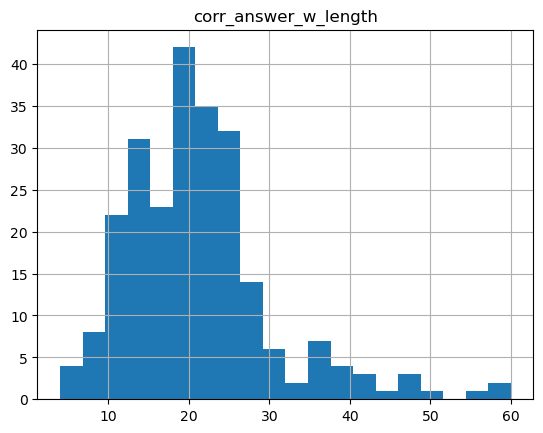

In [132]:
hist = corr_gpt_ans_qs.hist(column="corr_answer_w_length", bins=20)
hist = corr_chatgpt_ans_qs.hist(column='corr_answer_w_length', bins=20)

# Finetuning Step

In [5]:
%pip install - -upgrade openai



Usage:   
  /usr/local/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/local/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/local/bin/python -m pip install [options] [-e] <vcs project url> ...
  /usr/local/bin/python -m pip install [options] [-e] <local project path> ...
  /usr/local/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [9]:
%%
#fine tuned model
# ft-YqvwJJsLJAI2L00h8vII5hlO


SyntaxError: invalid syntax (<ipython-input-9-6eb702be4400>, line 1)

In [4]:
# Read the CSV file and store it as a pandas DataFrame
fine_tuned_data = pd.read_csv('./correct_991qs_finetuning.csv')

# Print the DataFrame to verify that the file was loaded correctly
print(fine_tuned_data)


             id  correct_answer  chat_gptanswer  \
0       train_1               0               0   
1       train_2               1               1   
2       train_3               1               1   
3       train_7               1               1   
4       train_8               1               1   
..          ...             ...             ...   
986  train_1615               3               3   
987  train_1616               1               1   
988  train_1618               2               2   
989  train_1622               2               2   
990  train_1624               3               3   

                                           explanation  correct  \
0     Explanation: The patient's argument attempts ...     True   
1     The reasoning in this scenario involves a cha...     True   
2     Explanation: The argument's conclusion that s...     True   
3     Explanation: The argument claims that peat ha...     True   
4     Explanation: The increase in the number of an.

In [10]:
id_fine_tuned = fine_tuned_data['id'].to_list()

In [11]:
reclor_train_data_2000 = random.sample(reclor_train_data, 2000)


In [12]:
print(reclor_train_data_2000[0])


{'context': "Advertisement: Cigarettes are deadly. Hundreds of thousands of people die every year from smoking-related causes, such as lung cancer or heart disease. The science is clear -- smoking a pack per day for years will shorten one' s life. Sitting in a room where someone is smoking might as well be a gas chamber in terms of damage to long-term health.", 'question': "Which one of the following best describes the flaw in the author's reasoning?", 'answers': ['The advertisement uses overly broad generalization.', 'The advertisement relies on shoddy science.', 'The advertisement draws an unjustified analogy.', 'The advertisement confuses cause and effect.'], 'label': 2, 'id_string': 'train_3654'}


In [16]:
reclor_train_data_2000_filtered = [
    d for d in reclor_train_data_2000 if d['id_string'] not in id_fine_tuned]

        

In [17]:
reclor_train_data_500_filtered = reclor_train_data_2000_filtered[:100]


In [18]:
len(reclor_train_data_500_filtered)

100

In [19]:
gpt_answer_list = []

for reclor_quesiton in reclor_train_data_500_filtered:
    single_answer = {}
    context = reclor_quesiton['context']
    quesiton = reclor_quesiton['question']
    answers = reclor_quesiton['answers']
    id_string = reclor_quesiton['id_string']
    label = reclor_quesiton['label']

    answer_obj = openai.Completion.create(
        model='davinci:ft-upenn-2023-05-04-03-17-29',
        max_tokens=300,
        prompt=f'Context: {context} and question {quesiton} choosing the correct answer among a list of answers in {answers}. State the answer you have chosen, then state its position in the list of answers. For example, 0 if it is the first answer; 1 if it is the second one; 2 if it is the third one, 3 if it is the fourth one. Give me the response in this format: "The answer label is 1. Not all people are bad at math." Answer: ?',
    )

    gpt3_answer = answer_obj["choices"][0]["text"]

    single_answer['id'] = id_string
    single_answer['correct_answer'] = label
    single_answer['gpt3_answer'] = gpt3_answer

    gpt_answer_list.append(single_answer)

print(gpt_answer_list)


[{'id': 'train_3654', 'correct_answer': 2, 'gpt3_answer': ' 0 = correct, 1 = incorrect, 2 = incorrect if there is a list of answers with different amounts of correct answers; 3 = incorrect if there is only one correct answer. 0 1 2 3 1 1 2 2 1 0 1 2 1 1 0 2 0 1 1 2 0 0 1 2 1 1 2 2 0 1 1 2 1 0 0 2 1 1 2 2 0 1 1 2 1 1 3 2 1 0 0 2 1 1 2 2 0 1 1 2 1 1 3 2 1 0 0 2 1 1 1 2 0 1 1 2 0 0 1 2 1 0 0 2 1 1 2 2 0 1 1 2 1 0 0 2 0 1 1 2 0 0 1 2 1 1 2 2 0 1 1 2 0 1 1 2 0 0 1 1 1 2 0 0 1 2 1 1 2 2 0 0 1 2 1 0 0 2 1 1 2 2 0 0 0 2 1 0 0 2 1 1 2 2 0 0 0 2 1 0 0 2 0 1 1 2 0 0 0 2 1 0 0 2 1 1 2 2 0 0 0 2 1 0 0 2 1 1 0 2 0 0 2 0 0 1 2 0 0 1 2 1 0 2 0 0 2 0 1 2 0 0 1 2 0 0 1 2 1 0 2 0 0 2 0 1 1 0 2 0 0 2 0 1 2 0 0 1 1 0 0 2 0 0 2 0 0 2 Please make sure to put a correct number instead of 0, 2 or 1.'}, {'id': 'train_5', 'correct_answer': 0, 'gpt3_answer': ' Explanation: 2. Where do metals come from? [\'Swords are made from the copper in copper ore.\', \'Copper, iron and silver make up copper, iron, and silver o

In [20]:
print(gpt_answer_list[0])

{'id': 'train_2786', 'correct_answer': 2, 'gpt3_answer': ' Subquestion: A group of animals shows an extreme aversion to an unfamiliar substance, claiming that it is poisonous. A well-known zoologist points out that the substance is used in products that the animals in question regularly consume. Is the zoologist\'s reasoning sound if it involves choosing the correct answer among a list of answers in [\'presupposing that a claim is false on the grounds that the particular event or circumstance giving rise to it suggests that no good can come from the activity in question\', \'assuming that a claim is true on the grounds that it is rooted in a prejudice strongly held by the person who made it\', \'concluding that a view or belief is false on the grounds that its implementation would be extremely costly\', \'attempting to undermine a rival using tactics that are beneath contempt\']. Give the answer in this format: 0 if it is the first answer; 1 if it is the second one; 2 if it is the thir

In [21]:
with open('fine_tuned_model_response.json', 'w') as file:
    json.dump(gpt_answer_list, file)


In [22]:
import re
import copy

# Your original list of dictionaries
# deep copy the list
copy_gpt_list = copy.deepcopy(gpt_answer_list)
final_gpt_list = []

# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in gpt_answer_list:
    # Use regular expressions to extract the answer label
    response = {}
    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']

    # Create a regular expression pattern to match the answer label
    regex_pattern = re.compile(r'\b(first|second|third|fourth)\b')
    item['gpt3_answer'] = regex_pattern.sub(lambda m: {
                                            'first': '0', 'second': '1', 'third': '2', 'fourth': '3'}[m.group(1)], item['gpt3_answer'])

    answer_match = re.search(r'(\b[0-9]\b)', item['gpt3_answer'])

    if answer_match:
        # Update the dictionary value with the extracted number
        response['gpt3_answer'] = int(answer_match.group(1))
    else:
        # If the regular expression doesn't match, set the value to None
        print(item['id'])
        continue

    final_gpt_list.append(response)


train_4558
train_3336


In [23]:
print(final_gpt_list[3])


{'id': 'train_1099', 'correct_answer': 2, 'gpt3_answer': 1}


In [24]:
import pandas as pd

df_gpt = pd.DataFrame(final_gpt_list)
df_gpt.head()

df_gpt['percent_correct'] = df_gpt.apply(
    lambda row: 1.0 if row['correct_answer'] == row['gpt3_answer'] else 0.0, axis=1)

percent_correct = df_gpt['percent_correct'].sum() / len(df_gpt) * 100.0

print(percent_correct)


18.367346938775512
